In [39]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

data = []

file = open('Weibull.csv', 'r')
for str in file:
    for c in str.split():
        data.append(float(c))
file.close()

1) Дифференцируем функцию распределения, находим плотность: 
$ p(x) = \gamma \cdot x^{\gamma - 1} e^{-x^{\gamma}} $
    
2) Функция правдоподобия:
$ f = \gamma^N \prod_{i=1}^{N} e^{-x^{\gamma}_i} \cdot x_i^{\gamma - 1} = \gamma^N e^{- \sum^N_{i=1} x^{\gamma}_i} \prod_{i=1}^{N} x_i^{\gamma - 1} $

3) Десятичный логарифм от функции правдоподобия:
$ L = N\lg \gamma - (\sum_{i=1}^{N} x_i^{\gamma})\lg(e) + (\gamma - 1) \cdot \sum_{i=1}^{N}\lg x_i $

Максимизируем логарифмическую функцию правдоподобия.

In [40]:
lg_x = np.arange(-2, 2.001, 0.001)
x = 10**lg_x

In [45]:
# n - количество элементов из выборки
# метод возвращает десятичный логарифм функции правдоподобия
def estimate(n):
    L = np.zeros(len(lg_x))
    for i in range(len(x)):
        for k in data[0:n]:
            if k == 0:
                k = 0.0001 
            L[i] += lg_x[i] + (x[i] - 1) * np.log10(k) - (k ** x[i])*np.log10(np.e) 
    return L

Оценим параметр формы по данным выборки за первые 4 года

In [46]:
L = estimate(1461)

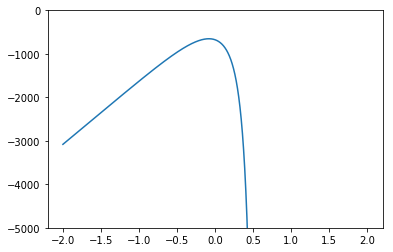

In [47]:
plt.plot(lg_x, L)
plt.ylim([-5000, 0])
plt.show()

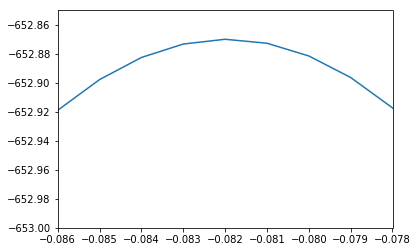

Значение максимума функции достигается в точке  [-0.082]


In [58]:
plt.plot(lg_x, L)
plt.ylim([-653, -652.85])
plt.xlim([-0.086, -0.078])
plt.show()

arg_max_1 = lg_x[np.where(L == max(L))]
print("Значение максимума функции достигается в точке ", arg_max_1)

Оценим параметр сдвига по полной выборке за 10 лет

In [59]:
L = estimate(3652)

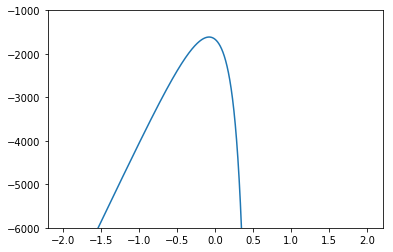

In [61]:
plt.plot(lg_x, L)
plt.ylim([-6000, -1000])
plt.show()

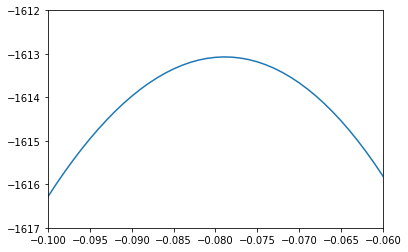

Значение максимума функции достигается в точке  [-0.079]


In [72]:
plt.plot(lg_x, L)
plt.ylim([-1617, -1612])
plt.xlim([-0.1, -0.06])
plt.show()

arg_max_2 = lg_x[np.where(L == max(L))]
print("Значение максимума функции достигается в точке ", arg_max_2)

In [75]:
print("Оценки параметра формы")
print("По первым 4 годам: ", 10**arg_max_1)
print("По всем 10 годам: ", 10**arg_max_2)

Оценки параметра формы
По первым 4 годам:  [ 0.82794216]
По всем 10 годам:  [ 0.83368118]


# Вывод:

Оценка параметра формы получилась равной 0.828 при рассмотрении данных выборки за первые 4 года. <br>
При рассмотрении полной выборки оценка равна 0.834.